<a href="https://colab.research.google.com/github/mehmetcihanyildiz/Bioinformatics/blob/main/simple_DNA_sequence_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [ ]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio import pairwise2

# **Loading fasta files**

In [11]:
for seq_record in SeqIO.parse('cov2.fasta',"fasta"):
  cov = seq_record.seq

In [12]:
for seq_record in SeqIO.parse('sars.fasta',"fasta"):
  sars = seq_record.seq

In [13]:
for seq_record in SeqIO.parse('mers.fasta',"fasta"):
  mers = seq_record.seq

# **Sequences of Sars, Cov and Mers**

In [24]:
sars

Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA')

In [25]:
cov

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [26]:
mers

Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA')

# **Number of Nucleotides in Sequences**

In [31]:
print("Number of nucleotides in Cov: ",len(cov))
print("Number of nucleotides in Sars: ",len(sars))
print("Number of nucleotides in Mers: ",len(mers))

Number of nucleotides in Cov:  29903
Number of nucleotides in Sars:  29751
Number of nucleotides in Mers:  30119


# **Finding Nucleotide Composition**

In [32]:
def nucleotides_composition(seq):
    nucleotides = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    for n in nucleotides:
        nucleotides[n] = seq.count(n)/len(seq)*100
    return nucleotides

In [34]:
cov_comp = nucleotides_composition(cov)
cov_comp

{'A': 29.943483931378122,
 'C': 18.366050229074006,
 'G': 19.60672842189747,
 'T': 32.083737417650404}

In [35]:
sars_comp = nucleotides_composition(sars)
sars_comp

{'A': 28.50660482000605,
 'C': 19.965715438136534,
 'G': 20.795939632281268,
 'T': 30.73174010957615}

In [36]:
mers_comp = nucleotides_composition(mers)
mers_comp

{'A': 26.22929048109167,
 'C': 20.306119061057803,
 'G': 20.930309771240747,
 'T': 32.534280686609776}

# **Converting dict to dataframe**

In [54]:
cov_df = pd.DataFrame.from_dict(cov_comp, orient='index')
cov_df = cov_df.reset_index()
cov_df = cov_df.rename(columns={"index": "Nucleotides", 0:"Composition"})


In [56]:
sars_df = pd.DataFrame.from_dict(sars_comp, orient='index')
sars_df = sars_df.reset_index()
sars_df = sars_df.rename(columns={"index": "Nucleotides", 0:"Composition"})

In [57]:
mers_df = pd.DataFrame.from_dict(mers_comp, orient='index')
mers_df = mers_df.reset_index()
mers_df = mers_df.rename(columns={"index": "Nucleotides", 0:"Composition"})

# **Barplot of Compositions**

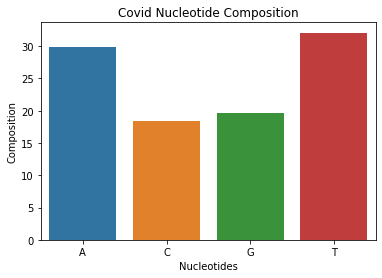

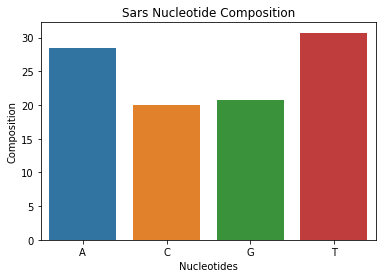

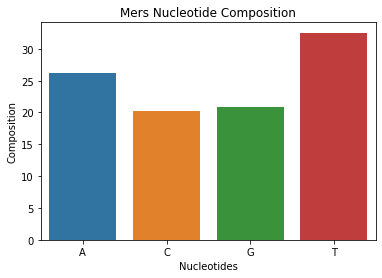

In [61]:
sns.barplot(x="Nucleotides",y="Composition",data=cov_df).set(title='Covid Nucleotide Composition')
plt.show()
sns.barplot(x="Nucleotides",y="Composition",data=sars_df).set(title='Sars Nucleotide Composition')
plt.show()
sns.barplot(x="Nucleotides",y="Composition",data=mers_df).set(title='Mers Nucleotide Composition')
plt.show()

# **Importing module for finding GC Content of Sequences**

In [64]:
from Bio.SeqUtils import GC

# **GC Contents of Sequences**

In [68]:
print(f" Covid GC% : {GC(cov)}")
print(f" Sars GC% : {GC(sars)}")
print(f" Mers GC% : {GC(mers)}")

 Covid GC% : 37.97277865097148
 Sars GC% : 40.7616550704178
 Mers GC% : 41.23642883229855


# **Determining Trimers**

In [69]:
trimers = ["AAA", "AAC", "AAG", "AAT", "ACA", "ACC", "ACG", "ACT", "AGA", "AGC", "AGG", "ATA", "ATC", "ATG", "CAA", 
           "CAC", "CAG", "CCA","CCC","CCG","CGA","CGC","CTA","CTC","GAA","GAC","GCA","GCC","GGA","GTA","TAA","TCA"]

# **Simple Function to See Numbers of Trimers in Sequence**

In [70]:
def trimer_composition(genome):
    trimer_dict = dict()
    for trimer in trimers:
        trimer_dict[trimer] = genome.count(trimer)
    return trimer_dict

In [73]:
tri_comp = trimer_composition(cov)
tri_comp

{'AAA': 654,
 'AAC': 615,
 'AAG': 580,
 'AAT': 761,
 'ACA': 755,
 'ACC': 376,
 'ACG': 164,
 'ACT': 674,
 'AGA': 570,
 'AGC': 301,
 'AGG': 329,
 'ATA': 448,
 'ATC': 339,
 'ATG': 725,
 'CAA': 703,
 'CAC': 426,
 'CAG': 438,
 'CCA': 354,
 'CCC': 102,
 'CCG': 74,
 'CGA': 95,
 'CGC': 94,
 'CTA': 561,
 'CTC': 269,
 'GAA': 535,
 'GAC': 340,
 'GCA': 372,
 'GCC': 187,
 'GGA': 282,
 'GTA': 469,
 'TAA': 719,
 'TCA': 549}

# **Converting dict to dataframe**

In [74]:
tri = pd.DataFrame.from_dict(tri_comp, orient ='index')
tri = tri.reset_index()
tri = tri.rename(columns={"index": "trimer", 0: "count"})

# **Plot of Numbers of Trimers**

In [75]:
r1 = tri.sort_values(by='count', ascending=False)
r1.style.bar(subset=["count"],color='#').background_gradient(cmap='Reds')

,trimer,count
3,AAT,761
4,ACA,755
13,ATG,725
30,TAA,719
14,CAA,703
7,ACT,674
0,AAA,654
1,AAC,615
2,AAG,580
8,AGA,570


# **Another Plot for Counts of Trimers**

<Axes: xlabel='count', ylabel='trimer'>

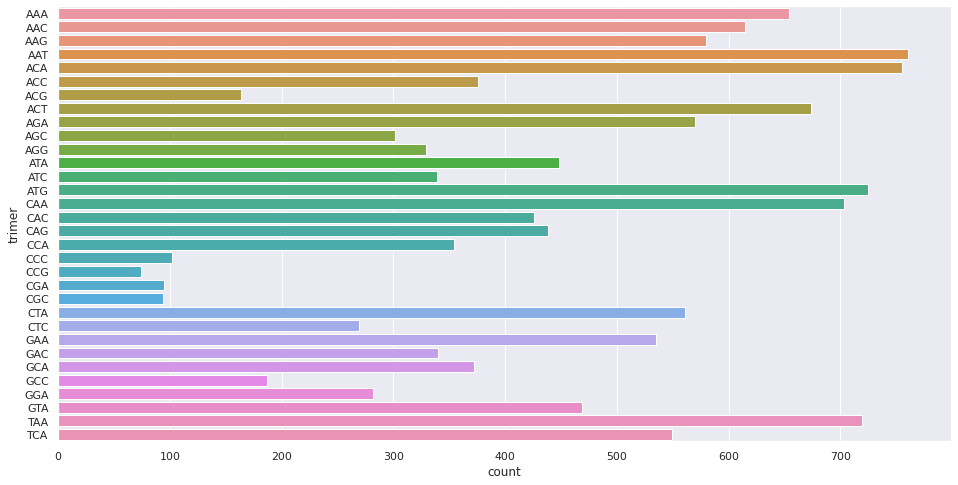

In [81]:
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x="count", y="trimer", data=tri)